In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.5
# plt.rcParams['axes.facecolor']='#E7E8E9'

---

In [2]:
MitoCarta3_file = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/MITOCARTA3.0/Mouse.MitoCarta3.0.xls'
MitoCarta = pd.read_excel(MitoCarta3_file, 'A Mouse MitoCarta3.0')
MitoPW    = pd.read_excel(MitoCarta3_file, 'C MitoPathways')

name2EnsgID = MitoCarta[['Symbol','EnsemblGeneID']].set_index('Symbol')['EnsemblGeneID'].to_dict()
name2UniprotID = MitoCarta[['Symbol','UniProt']].set_index('Symbol')['UniProt'].to_dict()

MitoPW['PW level'] = MitoPW['MitoPathway Hierarchy'].str.split('>').str.len()
MitoPW['EnsemblGeneIDs'] = ''
MitoPW['UniProtIDs'] = ''
for i in range(len(MitoPW)):

    # Collecting Ensembl gene IDs
    for gene in MitoPW.iloc[i,:]['Genes'].split(', '):
        if type(name2EnsgID[gene]) == float : continue
        MitoPW.iloc[i,4] += name2EnsgID[gene].replace('|',',') + ','
    MitoPW.iloc[i,4] = MitoPW.iloc[i,4][:-1]

    # Collecting UniProt IDs
    for gene in MitoPW.iloc[i,:]['Genes'].split(', '):
        if type(name2UniprotID[gene]) == float : continue
        MitoPW.iloc[i,5] += name2UniprotID[gene].replace('|',',') + ','
    MitoPW.iloc[i,5] = MitoPW.iloc[i,5][:-1]

MitoPW = MitoPW.set_index('MitoPathway',drop=True)

display(MitoPW)


Uniprot_Genesets = {
    # 'OXPHOS subunits' : pd.DataFrame({'uniprot_id' : MitoPW.loc['OXPHOS subunits','UniProtIDs'].split(',')}),
    # 'TCA cycle' : pd.DataFrame({'uniprot_id' : MitoPW.loc['TCA cycle','UniProtIDs'].split(',')}),
    # 'Lipid metabolism' : pd.DataFrame({'uniprot_id' : MitoPW.loc['Lipid metabolism','UniProtIDs'].split(',')}),
    # 'Fatty acid oxidation' : pd.DataFrame({'uniprot_id' : MitoPW.loc['Fatty acid oxidation','UniProtIDs'].split(',')}),
    # 'Mitochondrial ribosome' : pd.DataFrame({'uniprot_id' : MitoPW.loc['Mitochondrial ribosome','UniProtIDs'].split(',')}),
    'All MitoCarta' : MitoCarta[['UniProt']].drop_duplicates().rename(columns={'UniProt':'uniprot_id'})
}

,MitoPathway Hierarchy,Genes,PW level,EnsemblGeneIDs,UniProtIDs
MitoPathway,,,,,
Mitochondrial central dogma,Mitochondrial central dogma,"2810006K23Rik, Aars2, Alkbh1, Angel2, Apex1, A...",1,"ENSMUSG00000047635,ENSMUSG00000023938,ENSMUSG0...","Q80VP5,Q14CH7,P0CB42,Q8K1C0,P28352,Q925I1,Q9DC..."
mtDNA maintenance,Mitochondrial central dogma > mtDNA maintenance,"Apex1, Atad3a, Dna2, Endog, Exog, Lig3, Mettl4...",2,"ENSMUSG00000035960,ENSMUSG00000029036,ENSMUSG0...","P28352,Q925I1,Q6ZQJ5,O08600,Q8C163,Q80ZH7,Q3U0..."
mtDNA replication,Mitochondrial central dogma > mtDNA maintenanc...,"Dna2, Exog, Lig3, Mgme1, Polg, Polg2, Polrmt, ...",3,"ENSMUSG00000036875,ENSMUSG00000042787,ENSMUSG0...","Q6ZQJ5,Q8C163,Q80ZH7,Q9CXC3,Q3UG70,Q9QZM2,Q8BK..."
mtDNA nucleoid,Mitochondrial central dogma > mtDNA maintenanc...,"Atad3a, Mterf1a, Mterf1b, Mterf2, Poldip2, Pol...",3,"ENSMUSG00000029036,ENSMUSG00000040429,ENSMUSG0...","Q925I1,Q8CHZ9,B9EJ57,Q8BKY8,Q91VA6,Q3UG70,Q9QZ..."
mtDNA repair,Mitochondrial central dogma > mtDNA maintenanc...,"Apex1, Exog, Lig3, Ogg1, Polb, Polg, Primpol, ...",3,"ENSMUSG00000035960,ENSMUSG00000042787,ENSMUSG0...","P28352,Q8C163,Q80ZH7,O08760,Q8K409,Q3UG70,Q6P1..."
...,...,...,...,...,...
Mitophagy,Mitochondrial dynamics and surveillance > Mito...,"Bcl2l13, Fkbp8, Fundc1, Marchf5, Nipsnap1, Nip...",2,"ENSMUSG00000009112,ENSMUSG00000019428,ENSMUSG0...","P59017,O35465,Q9DB70,Q3KNM2,O55125,Q7TMG8,Q99L..."
Autophagy,Mitochondrial dynamics and surveillance > Auto...,"Bcl2l13, Fkbp8, Fundc1, Marchf5, Nbr1, Nipsnap...",2,"ENSMUSG00000009112,ENSMUSG00000019428,ENSMUSG0...","P59017,O35465,Q9DB70,Q3KNM2,P97432,O55125,Q7TM..."
Apoptosis,Mitochondrial dynamics and surveillance > Apop...,"Aifm1, Aifm2, Aifm3, Bad, Bak1, Bax, Bbc3, Bcl...",2,"ENSMUSG00000036932,ENSMUSG00000020085,ENSMUSG0...","Q9Z0X1,Q8BUE4,Q3TY86,Q61337,O08734,Q07813,Q99M..."


In [3]:
PT = pd.read_csv(f'{Project}/Results/Other_papers/Martinez_etal.2023.Cell_Metabolism/Tables/Proteome/PT_Exp_calc/v20240416/Martinez_PT_rel-log2Exp.tsv', sep='\t')
display(PT)

,uniprot_id,Brown_a,Brown_b,Brown_c,Brown_d,Brown_e,White_a,White_b,White_c,White_d,White_e,Beige_a,Beige_b,Beige_c,Beige_d,Beige_e
0,A2A432,-0.074850,0.085666,-0.074002,-0.187888,-0.172079,-0.236844,-0.137413,-0.198685,-0.261437,-0.282284,-0.240286,-0.331059,-0.409318,-0.347069,-0.216521
1,A2A5R2,0.064351,0.223206,-0.085057,-0.033321,0.060010,-0.081352,-0.200471,0.021149,-0.499037,-0.326296,0.076927,-0.142446,-0.281409,-0.095785,0.231977
2,A2A6Q5,-3.155325,-3.388649,-3.314327,-3.205466,-3.185033,-2.589559,-2.642542,-2.698825,-2.713264,-3.104117,-3.288310,-3.515049,-3.301387,-3.508976,-3.392548
3,A2A6T1,-2.265732,-2.110252,-2.234638,-2.078864,-2.003653,-0.507309,-0.172753,-0.460244,0.046191,-0.034195,-1.674481,-1.664011,-1.479901,-1.744515,-1.742731
4,A2A8Z1,0.889846,0.906883,0.924847,0.945380,0.869345,0.603088,0.665460,0.630047,0.615559,0.574148,1.313921,1.293155,1.306594,1.255854,1.351542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4792,Q9Z2Z6,2.948977,3.245757,2.833271,2.827613,2.768232,1.269041,1.238814,1.346909,0.553126,0.897962,3.362089,2.878996,2.723481,2.924878,3.678858
4793,Q9Z2Z9,0.589984,0.797424,0.598547,0.626617,0.544102,1.565423,1.384965,1.810949,1.406409,1.513392,1.009895,0.871197,0.707477,0.640139,1.189859
4794,Q9Z315,0.081497,-0.027752,0.083296,0.013845,0.094405,-0.015813,0.396209,-0.048062,0.568862,0.299782,-0.112623,0.102166,0.221449,0.091273,-0.330196
4795,Q9Z321,-1.306664,-0.979405,-1.353921,-1.641317,-1.384855,-0.917926,-0.849281,-0.887178,-0.959680,-0.967820,-1.432160,-1.632041,-1.638174,-1.679113,-1.134853


---

In [4]:
Genesets = {
    'All mito' : Uniprot_Genesets['All MitoCarta'],
    'All' : PT[['uniprot_id']],
    # 'OXPHOS subunits' : Uniprot_Genesets['OXPHOS subunits']
}

celltypes = ['Beige','Brown','White']

In [5]:
group_mem_n = len(celltypes)
group_gap = 0.5
x_pos = [i*(group_mem_n+group_gap) + j for i in range(len(Genesets)) for j in range(len(celltypes))]
box_colors = ['#ffe3e9', '#dddddd']
box_plot_data = []
for GS in Genesets:
    for celltype in celltypes:
        tmp = pd.merge(Genesets[GS], PT, on='uniprot_id')
        box_plot_data.append( tmp[[f'{celltype}_{rep}' for rep in ['a','b','c','d','e']]].mean(axis=1).to_list() )
        # box_plot_data.append( tmp[[f'{celltype}_{rep}' for rep in ['a','b','c','d','e']]].stack().to_list() )
box_color_list = [clr for clr in box_colors for i in range(group_mem_n)]

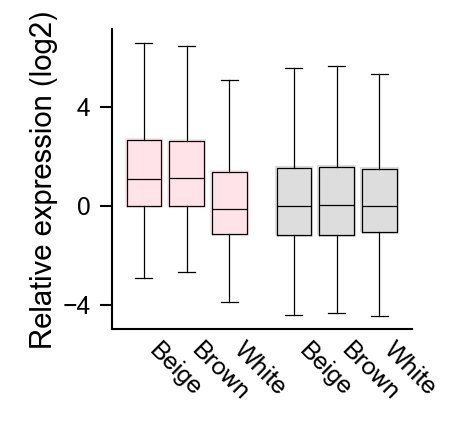

<Figure size 640x480 with 0 Axes>

In [6]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

width_ratios = [1]
height_ratios = [1]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)


ax = fig.add_subplot(grid[0,0])

box = ax.boxplot(box_plot_data, positions=x_pos, 
                 widths=0.8,
                 medianprops={'linewidth':0.3, 'color':'k'},
                 boxprops={'linewidth':0.3, 'color':'k'},
                 whiskerprops={'linewidth':0.3, 'color':'k'},
                 capprops={'linewidth':0.3, 'color':'k'},
                 showfliers=False,
                #  showmeans=True, meanprops={'marker':'D', 'markersize':'1.5', 'markerfacecolor':'k', 'markeredgewidth':0}
                 )
for artist, color in zip(box['boxes'], box_color_list):
    patch = mpl.patches.PathPatch(artist.get_path(), color=color)
    ax.add_artist(patch)


ax.set_xlim(x_pos[0]-0.5-group_gap/2, x_pos[-1]+0.5+group_gap/2)
ax.set_xticks(x_pos)
ax.set_yticks([-4, 0, 4])
ax.set_xticklabels(celltypes*2, rotation=-45, ha='left')
ax.tick_params(width=0.5, length=3, pad=2)
ax.tick_params(axis='x', length=0, pad=2)

ax.set_xlabel('')
ax.set_ylabel('Relative expression (log2)', labelpad=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
# ax.spines['left'].set_visible(False)


plt.savefig('Martinez_mito-PTexp_box.pdf', bbox_inches='tight')
plt.show()
plt.clf()

In [8]:
from scipy.stats import ks_2samp, ttest_rel

print(ks_2samp(box_plot_data[0], box_plot_data[2])) # Beige vs White
print(ks_2samp(box_plot_data[1], box_plot_data[2]), '\n') # Brown vs White

print(ks_2samp(box_plot_data[3], box_plot_data[5])) # Beige vs White
print(ks_2samp(box_plot_data[4], box_plot_data[5]), '\n') # Brown vs White


print(ttest_rel(box_plot_data[0], box_plot_data[2])) # Beige vs White
print(ttest_rel(box_plot_data[1], box_plot_data[2]), '\n') # Brown vs White

print(ttest_rel(box_plot_data[3], box_plot_data[5])) # Beige vs White
print(ttest_rel(box_plot_data[4], box_plot_data[5]), '\n') # Brown vs White

KstestResult(statistic=0.2814285714285714, pvalue=8.17856394684772e-25)
KstestResult(statistic=0.28285714285714286, pvalue=4.581088714102899e-25) 

KstestResult(statistic=0.026299568522703924, pvalue=0.06902539787983049)
KstestResult(statistic=0.02280665707828231, pvalue=0.1589996697537129) 

Ttest_relResult(statistic=32.75431187953778, pvalue=2.559019372323885e-143)
Ttest_relResult(statistic=36.78434563416731, pvalue=1.2645415466700707e-165) 

Ttest_relResult(statistic=0.5307661579166029, pvalue=0.5956050564930782)
Ttest_relResult(statistic=1.749691843946072, pvalue=0.08023453516440372) 

